In [163]:
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize, word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [208]:
df = pd.read_csv("winemag-data-130k-v2.csv")

In [209]:
df = df.rename(columns= {'Unnamed: 0': 'col1'})
df = df.drop(['col1'], axis = 1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [210]:
country_num =df['country'].unique()
df = df.dropna(subset=['price','points','country','province','variety'])
df = df[df['price']<200].reset_index()
df

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120134,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
120135,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
120136,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
120137,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [211]:
df1 = df.drop(df.columns[[0,3,7,8,9,10,11,12,13]], axis = 1)
df1

,country,description,points,price,province
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain
...,...,...,...,...,...
120134,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel
120135,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon
120136,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace
120137,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace


In [212]:
l = list()
l = df1['country'].unique()
d = dict()
for i in range(len(l)):
    d[l[i]] = i 
d  

{'Portugal': 0,
 'US': 1,
 'Spain': 2,
 'Italy': 3,
 'France': 4,
 'Germany': 5,
 'Argentina': 6,
 'Chile': 7,
 'Australia': 8,
 'Austria': 9,
 'South Africa': 10,
 'New Zealand': 11,
 'Israel': 12,
 'Hungary': 13,
 'Greece': 14,
 'Romania': 15,
 'Mexico': 16,
 'Canada': 17,
 'Turkey': 18,
 'Czech Republic': 19,
 'Slovenia': 20,
 'Luxembourg': 21,
 'Croatia': 22,
 'Georgia': 23,
 'Uruguay': 24,
 'England': 25,
 'Lebanon': 26,
 'Serbia': 27,
 'Brazil': 28,
 'Moldova': 29,
 'Morocco': 30,
 'Peru': 31,
 'India': 32,
 'Bulgaria': 33,
 'Cyprus': 34,
 'Armenia': 35,
 'Switzerland': 36,
 'Bosnia and Herzegovina': 37,
 'Ukraine': 38,
 'Slovakia': 39,
 'Macedonia': 40,
 'China': 41}

In [213]:
df1['ct'] = np.zeros(120139)
for i, country in enumerate(df1['country']):
    df1['ct'][i] = d[country]

In [214]:
df1

,country,description,points,price,province,ct
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,0.0
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,1.0
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,1.0
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,1.0
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,2.0
...,...,...,...,...,...,...
120134,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,5.0
120135,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,1.0
120136,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,4.0
120137,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,4.0


In [215]:
df1['price'].corr(df1['ct'])

-0.09354292142302549

In [216]:
l1 = list()
l1 = df['province'].unique()
d1 = dict()
for i in range(len(l1)):
    d1[l1[i]] = i 
d1  

{'Douro': 0,
 'Oregon': 1,
 'Michigan': 2,
 'Northern Spain': 3,
 'Sicily & Sardinia': 4,
 'Alsace': 5,
 'Rheinhessen': 6,
 'California': 7,
 'Mosel': 8,
 'Other': 9,
 'Mendoza Province': 10,
 'Virginia': 11,
 'Colchagua Valley': 12,
 'Southern Italy': 13,
 'Beaujolais': 14,
 'Maule Valley': 15,
 'Bordeaux': 16,
 'Maipo Valley': 17,
 'Washington': 18,
 'Central Italy': 19,
 'Champagne': 20,
 'Burgundy': 21,
 'South Australia': 22,
 'Rapel Valley': 23,
 'Galicia': 24,
 'France Other': 25,
 'Tuscany': 26,
 'Burgenland': 27,
 'New York': 28,
 'Leyda Valley': 29,
 'Piedmont': 30,
 'Stellenbosch': 31,
 'Simonsberg-Stellenbosch': 32,
 'Alentejano': 33,
 'Central Spain': 34,
 'Southwest France': 35,
 'Aconcagua Valley': 36,
 'Loncomilla Valley': 37,
 'Marlborough': 38,
 'Northeastern Italy': 39,
 'Casablanca Valley': 40,
 'Veneto': 41,
 'Western Cape': 42,
 'Judean Hills': 43,
 'Alentejo': 44,
 'Coastal Region': 45,
 'Rhône Valley': 46,
 'Galilee': 47,
 'Beira Atlantico': 48,
 'Tokaj': 49,
 '

In [217]:
df1['pr'] = df1['ct']
for i, province in enumerate(df1['province']):
    df1['pr'][i] = d1[province]


In [223]:
df1

,country,description,points,price,province,ct,pr
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,0.0,0.0
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,1.0,1.0
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,1.0,2.0
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,1.0,1.0
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,2.0,3.0
...,...,...,...,...,...,...,...
120134,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,5.0,8.0
120135,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,1.0,1.0
120136,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,4.0,5.0
120137,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,4.0,5.0


In [222]:
df1['pr'].corr(df1['points'])

-0.04332105254869728

In [224]:
train_df = [df1['price'], df1['ct'], df1['pr'], df['points']]
df_model = pd.concat(train_df, axis=1)

In [225]:
df_model

,price,ct,pr,points
0,15.0,0.0,0.0,87
1,14.0,1.0,1.0,87
2,13.0,1.0,2.0,87
3,65.0,1.0,1.0,87
4,15.0,2.0,3.0,87
...,...,...,...,...
120134,28.0,5.0,8.0,90
120135,75.0,1.0,1.0,90
120136,30.0,4.0,5.0,90
120137,32.0,4.0,5.0,90


In [311]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.2)

x_train = train.iloc[0:,0:3]#independent variables 
y_train = train['points']# last column 
x_test = test.iloc[0:,0:3]
y_test = test['points']

<h2>Correlation</h2>

In [312]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
model.coef_

array([0.06694586, 0.0083966 , 0.00037907])

In [313]:
import statsmodels.api as sm
print(sm.OLS(df1.points, df1.price).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                          2.421e+05
Date:                Tue, 22 Nov 2022   Prob (F-statistic):                        0.00
Time:                        19:15:37   Log-Likelihood:                     -6.4266e+05
No. Observations:              120139   AIC:                                  1.285e+06
Df Residuals:                  120138   BIC:                                  1.285e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

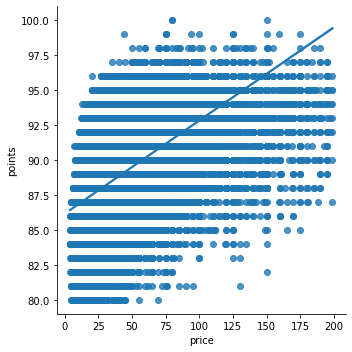

In [314]:
import seaborn as sns
sns.lmplot(y = 'points', x='price', data=df1)

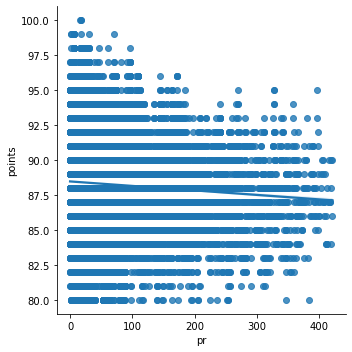

In [315]:
sns.lmplot(y = 'points', x='pr', data=df1)

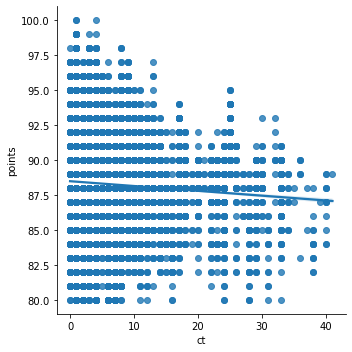

In [316]:
sns.lmplot(y = 'points', x='ct', data=df1)

<h2>Regressive Model</h2>

In [317]:
testing_predictions = model.predict(x_test)
testing_predictions

array([87.00296707, 89.3529524 , 88.27493837, ..., 87.04608731,
       88.03115053, 87.46931363])

In [318]:
y_test

82857     84
68737     91
35206     90
1512      85
70210     88
          ..
74108     86
55704     86
27211     85
119210    91
105405    85
Name: points, Length: 24028, dtype: int64

In [319]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
r2_score(y_test, testing_predictions)

0.2907944472422016

In [320]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

y_pred = logit.predict(x_test)
y_pred

array([87, 90, 88, ..., 87, 88, 87])

In [321]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.16497419677043448

<h2>Decision Tree</h2>

In [337]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X=x_train,y=y_train)

DecisionTreeClassifier(random_state=10)

In [338]:
clf.score(X=x_test, y=y_test)

0.18699017812552024

In [339]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=3)
#model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)